# Text Recognition with OpenCV

In [2]:
import cv2 #cv2 for reading, preprocessing images and text detection
import matplotlib.pyplot as plt

In [55]:
#read image
im = cv2.imread('./images/test3.jpg', cv2.IMREAD_GRAYSCALE) # set flag to GRAYSCALE, by default it is cv2.IMREAD_COLOR

In [56]:
cv2.imshow('ImageWindow',im)
cv2.waitKey(0); #the ouput appears in a seperate pop-up window

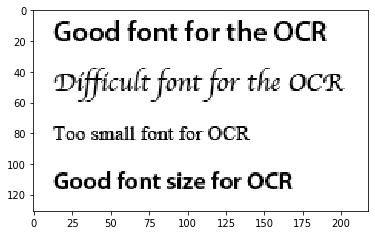

In [58]:
im = cv2.imread('./images/test3.jpg')
plt.imshow(im); #use plt to preview the image within notebook

### Preprocessing Images

In [59]:
#gray scale
def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(r'./preprocess/img_gray.jpg',img) #save processed image
    return img

In [60]:
#blur
def blur(img):
    
    img_blur = cv2.GaussianBlur(img, (5,5), 0)
    cv2.imwrite(r'./preprocess/img_blur.jpg',img_blur)
    return img_blur

In [61]:
#threshold
def threshold(img):
    """Pixels with value with below 100 are turned black(0) and those above are turned white(255)"""
    img_thres = cv2.threshold(img, 100, 255, cv2.THRESH_TRUNC )[1]
    cv2.imwrite(r'./preprocess/img_threshold.jpg',img_thres)
    return img_thres

In [62]:
# preview above written functions
gray_img = gray(im)
cv2.imshow('Gray_Image', gray_img)
cv2.waitKey(0);

In [63]:
blur_img = blur(im)
cv2.imshow('Blur_Image', blur_img)
cv2.waitKey(0);

In [64]:
thres_img = threshold(gray_img)
cv2.imshow('Threshold_Image', thres_img)
cv2.waitKey(0);

In [65]:
# Finding contours 
contours, _ = cv2.findContours(thres_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

# Text Detection

In [66]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [72]:
# text detection
def contours_text(orig,contours):
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 255), 2) 
        
        #cv2.imshow('cnt',rect)
        #cv2.waitKey(0)

        # Cropping the text block for giving input to OCR 
        cropped = orig[y:y + h, x:x + w] 

        # Apply OCR on the cropped image 
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(cropped, config=config) 

        print(text)

In [73]:
contours_text(thres_img,contours)

 

 

Good font for the OCR
Difficult font for the OCR

Tao small font for OCR,

 

Good font size for OCR

 

 



##### This code works well on clean images, but when there's a lot of noise in the background, then it performs poorly.

In [71]:
fail_img = cv2.imread('./images/stop-sign.jpg')
cv2.imshow("Fail",fail_img)
cv2.waitKey(0);

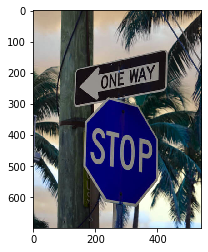

In [75]:
plt.imshow(fail_img)

In [74]:
gray_img = gray(fail_img)
thres_img = threshold(gray_img)
contours, _ = cv2.findContours(thres_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
contours_text(thres_img, contours)

This gives a NULL output. So we will have to perform more operations on our image or we can use a custom model for OCR like EAST.